In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the preprocessed data
data_classify= pd.read_csv('/Users/sabareeswarans/Desktop/BD_Lab/BD_final/PreProcessed_data/YouTube_Scraped_PP_final.csv')

In [3]:
# Filling Null Values
data_classify['description']=data_classify['description'].fillna(' ')
data_classify = data_classify.dropna(subset=['description'])
data_classify = data_classify.reset_index(drop=True)
data_classify = data_classify.dropna(subset=['title'])
data_classify = data_classify.reset_index(drop=True)
data_classify=data_classify.drop('Unnamed: 0',axis=1)

In [4]:
# no null values
data_classify.isnull().sum()

links          0
title          0
description    0
category       0
dtype: int64

In [5]:
df_link = pd.DataFrame(columns = ["links"])
df_title = pd.DataFrame(columns = ["title"])
df_description = pd.DataFrame(columns = ["description"])
df_category = pd.DataFrame(columns = ["category"])

In [6]:
df_link['links'] = data_classify['links']
df_title ['title']= data_classify['title']
df_description['description'] = data_classify['description']
df_category['category'] = data_classify['category']

In [7]:
# Creating own Text corpus by combining Title and description
import re
corpus_title = []
for i in range(0, 12416):
  review =  df_title['title'][i]
  review = review.split()
  review = ' '.join(review)
  corpus_title.append(review)

In [8]:
corpus_title

['hours vegetarian food challenge korea vlog cook',
 'volvo engin factori made manufactur powertrain assembl line',
 'deep learn tutorial',
 'japan travel cost japan rail pass japan travel guid',
 'irish peopl tast indian food',
 'big vs medium vs small food challenge never end food giant vs tiny food go genius',
 'hammerstep hip hop meet tradit irish danc america got talent',
 'stephen hawk brief histori time',
 'oneplus pro review huge hasselblad promise',
 'human histori documentari',
 'kingston hyperx blu mhz ddr overclock guid tutori linu tech tip',
 'hji top manufactur furnitur hardwar handl knob',
 'day life harvard comput scienc student',
 'histori idea love',
 'travel india full documentari histori india urdu hindi',
 'phil tippetts mad god teaser trailer stop motion animation scifi horror feature film',
 'chaar sahibzaade rise banda singh bahadur best movie scenes animation movie',
 'make largest candy ever viral food hack toy yummy ideas cool tool',
 'junior new system jn fi

In [9]:
corpus_description = []
for i in range(0, 12416):
  review =  df_description['description'][i]
  review = review.split()
  review = ' '.join(review)
  corpus_description.append(review)

In [10]:
corpus_description


['hello today go h vegetarian food challenge hope guy enjoy video',
 'volvo engin factori made manufactur manufactur process volvo car drive e engin rang love car subscrib gommeblog car perform youtub channel volvo car engin manufactur compani engin plant sk vde sweden gommeblog car tv perform webzin devot exclus intern world automobil car news made video car factori product volvo engin factori make powertrain volvo suv assembl interior volvo xc volvo volvo xc sound',
 'deep learn tutorial su lab ucsd',
 'japan travel cost japan rail pass japan travel guid http www youtub com watch v luml share inform japan rail pass welcom experi japan yuka show real japan right place want know japan plan travel trip japan got mani question japan rail pass hope answer question japan rail pass video share inform peopl want know first whether get japan rail pass right choic everybodi differ itinerari unless join packag tour pleas use inform video decid whether get japan rail pass hyperdia japan rail pas

In [11]:
## Now, convert these lists into dataframes

title = pd.DataFrame({'title':corpus_title})
description = pd.DataFrame({'description':corpus_description})

In [12]:
from sklearn.preprocessing import LabelEncoder
dfcategory = df_category.apply(LabelEncoder().fit_transform)

In [13]:
dfcategory

,category
0,7
1,0
2,5
3,11
4,7
...,...
12411,3
12412,7
12413,6
12414,3


In [14]:
df_model = pd.concat([df_link, title, description, dfcategory], axis=1)
df_model = df_model.reindex(df_link.index)

### Data Preprocessed to train and test the ML MODELS

In [15]:
df_model

,links,title,description,category
0,Co0iR1FjGY,hours vegetarian food challenge korea vlog cook,hello today go h vegetarian food challenge hop...,7
1,TelY8wdrA,volvo engin factori made manufactur powertrain...,volvo engin factori made manufactur manufactur...,0
2,fL6uJYFrp4,deep learn tutorial,deep learn tutorial su lab ucsd,5
3,lUmL6sGvaig,japan travel cost japan rail pass japan travel...,japan travel cost japan rail pass japan travel...,11
4,lp0ur_qXoM,irish peopl tast indian food,thing dessert never confus make sure subscrib ...,7
...,...,...,...,...
12411,CsEWdTR7Oi8,hampi gloriou histori time ii day ii k video,video follow messag maharaja krishnadevraya pl...,3
12412,iBFDGKfY7xU,korean food never seen uniqu korean eleven tou...,korean street food challeng http www youtub co...,7
12413,kReFGDDGn5Y,lord buddha animation film power life,lord buddha power life buddha reveal power lov...,6
12414,6HLmhxLmRp4,evolut spider man costum yellow spandex nowthi...,subscrib nowthi nerd http go nowth nerd subscr...,3


### Creating Bag of words for corpus1-title and corpus-2 description

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus_title, corpus_description).toarray()
y = df_model.iloc[:, 3].values

In [26]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [27]:
y

array([7, 0, 5, ..., 6, 3, 3])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [131]:
# shape of the input data to be passed through the ML classifiers
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(9932, 2500)
(2484, 2500)
(9932,)
(2484,)


In [132]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve
xg=xgb.XGBClassifier(random_state = 15,learning_rate=0.01)
svc =SVC(random_state = 15)
lg =LogisticRegression(random_state = 15)
bg=BaggingClassifier(random_state = 15)
rf=RandomForestClassifier(random_state = 15)
gb=GradientBoostingClassifier(random_state = 11)

In [133]:
for i in [xg,svc,lg,bg,rf,gb]:
    i.fit(X_train,y_train)
    pred =i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print('Accuracy Score for test data,',accuracy_score(y_test,pred)*100)
    print('Accuracy Score for train data',accuracy_score(y_train,i.predict(X_train))*100)
    print(classification_report(y_test,pred))
    print('Confusion Matrix for the Model',i)
    print(confusion_matrix(y_test,pred))
    print('................................................................')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=15, reg_alpha=0, ...)
Accuracy Score for test data, 92.23027375201288
Accuracy Score for train data 93.85823600483286
              precision    recall  f1-score   support

           0       0.68      0.95      0.79       263
           1       0.99      0.99      0.99       115
           2       0.98      0.98 

KeyboardInterrupt: 

In [31]:
# save the best model XGBoost with Hyper Tuned
filename2= '/Users/sabareeswarans/Desktop/BD_Lab/BD_final/Best_Model/xgbClassifier_predict.obj'
joblib.dump(xg,filename2)

NameError: name 'xg' is not defined

In [149]:
loaded_model=joblib.load(filename2)
pred_best2 =loaded_model.predict(X_test)
test_score_best2=accuracy_score(y_test,pred_best2)
train_score_best2=accuracy_score(y_train,loaded_model.predict(X_train))
print('Hyper Tuned model:XGBoost, Test Accuracy:',test_score_best2*100)
print('Hyper Tuned model:XGBoost,Train Accuracy:',train_score_best2*100)
print("Confusion Matrix")
best_model_array_con2=confusion_matrix(y_test,pred_best2,labels=[0,1,2,3,4,5,6,7,8,9,10,11])
print(best_model_array_con2)

Hyper Tuned model:XGBoost, Test Accuracy: 92.23027375201288
Hyper Tuned model:XGBoost,Train Accuracy: 93.85823600483286
Confusion Matrix
[[250   0   1   3   1   0   0   0   1   6   0   1]
 [  1 114   0   0   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   1   0   0   0   0   1]
 [ 11   0   0 248   1   0   0   1   0   0   3   1]
 [ 16   0   0   4 296   0   0   0   0   0   0   1]
 [  2   1   1   0   0  91   1   0  18   0   0   0]
 [  4   0   0   0   0   0  97   0   0   0   0   0]
 [  9   0   0   1   0   0   0 392   0   0   0   1]
 [  3   0   0   0   0  12   0   0 112   0   0   0]
 [ 23   0   0   0   0   0   0   1   0  95   1   0]
 [ 34   0   0   4   1   0   1   0   0   0 238   0]
 [ 14   0   0   3   1   0   0   3   0   0   0 252]]


In [155]:
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix for best XGBoost Classifier')



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix for best XGBoost Classifier


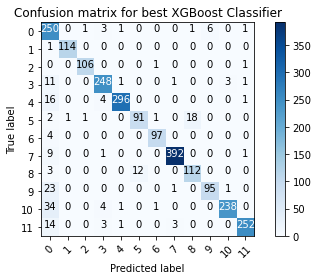

In [162]:
cnf_matrix = confusion_matrix(y_test,pred_best2,labels=[0,1,2,3,4,5,6,7,8,9,10,11])
np.set_printoptions(precision=10)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11],
                      title='Confusion matrix for best XGBoost Classifier')
plt.savefig('/Users/sabareeswarans/Desktop/BD_Lab/BD_final/Analysis_Results/XgboostConMatrix',dpi=500)

In [164]:
y_test

array([10, 11,  4, ...,  7,  5,  7])

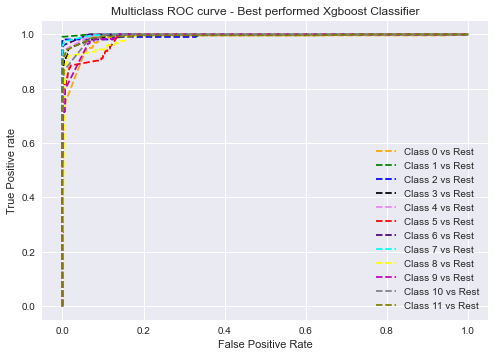

In [199]:

# ROC Curve - Performance measurement of the classification Problem.
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 12
pred_prob = loaded_model.predict_proba(X_test)
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='violet', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='red', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='indigo', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='cyan', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='yellow', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='m', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='grey', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='olive', label='Class 11 vs Rest')

plt.title('Multiclass ROC curve - Best performed Xgboost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('/Users/sabareeswarans/Desktop/BD_Lab/BD_final/Analysis_Results/Multiclass ROC',dpi=300);

In [ ]:
## Loading the model and categorizing the test data
import joblib
loaded_model_p =joblib.load("/Users/sabareeswarans/Desktop/BD_Lab/BD_final/Best_Model/xgbClassifier_predict.sav")
result =loaded_model_p(X_test)
xgbooster_classifier_result= pd.DataFrame({'links':df_link.to_string,'title':df_title.to_string, 'description':df_description.to_string,  'category Actual':df_category.to_string,'category predicted_xgb':result})

# This test data has 6000 records which is going to be the backend database for My Youtube Recommendation System
xgbooster_classifier_result.to_csv("/Users/sabareeswarans/Desktop/BD_Lab/BD_final/Custom_dataset/testdata_xgb.csv")

## Creating the Ground truth for category from the XGbooster classifying result

In [ ]:
## Creating the Ground truth for Title and category which is going to be used by  KMeans Recommender

videoCategory=[]
for index, row in xgbooster_classifier_result.iterrows():
    category=xgbooster_classifier_result['category']

    for i in category:
        if i not in videoCategory:
            videoCategory.append(i)
videoCategory[:10]

In [ ]:
def convertCategoryBinary(category_list):
    binaryList = []

    for i in videoCategory:
        if i in category_list:
            binaryList.append(1)
        else:
            binaryList.append(0)

    return binaryList

In [ ]:
xgbooster_classifier_result['groundTruth_category']=xgbooster_classifier_result['category'].apply(lambda x:convertCategoryBinary(x))
xgbooster_classifier_result['groundTruth_category']

## Creating the Ground truth for Title from the XGbooster classifying result


In [ ]:
# checking unique Title entries alone For creating One Hot Vector.
words_list_unique = []
for index, row in xgbooster_classifier_result.iterrows():
    words=xgbooster_classifier_result['title']
    for i in words:
        if i not in words_list_unique:
            words_list_unique.append(i)

In [ ]:
def convertTitleBinary(words):
    binaryList = []
    for i in words_list_unique:
        if i in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [ ]:
xgbooster_classifier_result['groundTruth_title']=xgbooster_classifier_result['title'].apply(lambda x:convertCategoryBinary(x))
xgbooster_classifier_result['groundTruth_title']

In [ ]:
# Add Category and binary in thier binary values list in the dataframe
new_id = list(range(0,xgbooster_classifier_result.shape[0]))
xgbooster_classifier_result['new_id']=new_id
xgbooster_classifier_result=xgbooster_classifier_result[['Video Id','Title','new_id','Description', 'Category','category_bins','word_bins']]


In [ ]:
### Final Data after XGB classifier and OneHotencoding encoding ( Which is going to act as backend database)
xgbooster_classifier_result.to_csv('/Users/sabareeswarans/Desktop/BD_Lab/BD_final/Custom_dataset/testdata_with_oneHotEncoding.csv')